# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **[Wen]**  <br/>
Firstname: **[Wen]**    <br/>
Student ID: **[31514081]**    <br/>
Email: **[wwen0009@student.monash.edu]**    <br/>
Your tutorial time: **[FIT3181 Laboratory 01_OnCampus: Thursday 10:00-12:00 ]**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:59pm Sunday, 18 September 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points], 30%**
* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points], 30%**
* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 6. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you need to capture the screenshots of your Google Colab model training and put in corresponding places in your Jupyter notebook. You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).** 

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [14]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

In [15]:
tf.random.set_seed(1234)

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data() #Insert your code here

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [17]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full =  X_train_full_img.reshape(num_train, -1)
X_test =    X_test_img.reshape(num_test,-1) 
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [18]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, y_train = X_train_full[:i], y_train_full[:i]#Insert your code here
X_valid, y_valid = X_train_full[i:], y_train_full[i:]#Insert your code here
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0#Insert your code here

####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show **random** $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
X_train_full_img.shape

(60000, 28, 28)

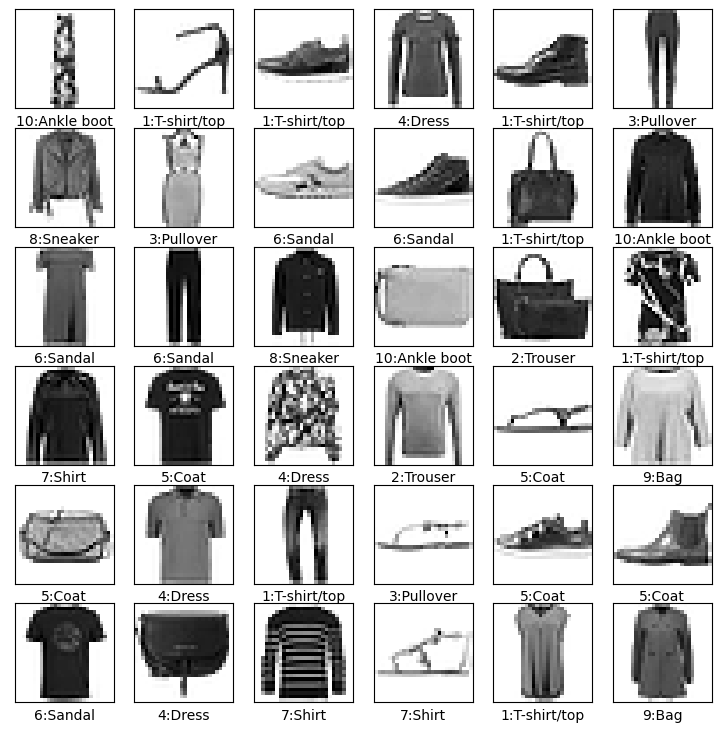

In [21]:
import random
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
class_names = ["1:T-shirt/top",
               "2:Trouser", 
               "3:Pullover", 
               "4:Dress",
               "5:Coat",
               "6:Sandal",
               "7:Shirt", 
               "8:Sneaker", 
               "9:Bag", 
               "10:Ankle boot"]
data = random.sample(range(0,len(X_train_full_img)), 36)
picture = X_train_full_img[data]

fig=plt.figure(figsize=(1.5*6,1.5*6))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(picture[i], cmap = "binary")
    class_index = y_train_full[i]
    plt.xlabel(class_names[class_index])
    plt.grid(False)
plt.show()

####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [22]:
#Insert your code here and you can add more cells if necessary
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [23]:
dnn_model = Sequential()
dnn_model.add(Dense(units=20,  input_shape=(784,), activation='relu'))
dnn_model.add(Dense(units=40, activation='relu'))
dnn_model.add(Dense(units=10, activation='softmax'))

In [24]:
dnn_model.build()  # computional graph
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [25]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 1s 556us/step - loss: 0.5927 - accuracy: 0.7943 - val_loss: 0.4455 - val_accuracy: 0.8418
Epoch 2/20
1688/1688 [==============================] - 1s 497us/step - loss: 0.4237 - accuracy: 0.8500 - val_loss: 0.4079 - val_accuracy: 0.8565
Epoch 3/20
1688/1688 [==============================] - 1s 514us/step - loss: 0.3900 - accuracy: 0.8603 - val_loss: 0.3762 - val_accuracy: 0.8623
Epoch 4/20
1688/1688 [==============================] - 1s 467us/step - loss: 0.3710 - accuracy: 0.8675 - val_loss: 0.3793 - val_accuracy: 0.8620
Epoch 5/20
1688/1688 [==============================] - 1s 533us/step - loss: 0.3584 - accuracy: 0.8715 - val_loss: 0.3680 - val_accuracy: 0.8675
Epoch 6/20
1688/1688 [==============================] - 1s 579us/step - loss: 0.3442 - accuracy: 0.8770 - val_loss: 0.3754 - val_accuracy: 0.8642
Epoch 7/20
1688/1688 [==============================] - 1s 552us/step - loss: 0.3351 - accuracy: 0.8781 - val_loss: 0.3833 -

####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [27]:
#Insert your code here. You can add more cells if necessary
act = ['sigmoid','tanh','relu'] 
n1 = [20,40]
n2 = [20,40]
max_acc = 0
best_para = {"N":None,"n":None,"act":None}
for a in act:
    for n in n1:
        for N in n2:
            dnn_model = Sequential()
            dnn_model.add(Dense(units=n,  input_shape=(784,), activation= a ))
            dnn_model.add(Dense(units=N, activation= a))
            dnn_model.add(Dense(units=10, activation='softmax'))
            dnn_model.build() 
            dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))
            acc = dnn_model.evaluate(X_test, y_test)[1]
            if acc > max_acc:
                max_acc = acc
                best_para["n"] = n
                best_para["act"] = a
                best_para["N"] = N
print(f'best accuracy is {max_acc}')
print(f'act is {best_para["act"]}, n1 is {best_para["n"]}, n2 is {best_para["N"]}')

Epoch 1/20
1688/1688 [==============================] - 1s 548us/step - loss: 1.0632 - accuracy: 0.7071 - val_loss: 0.6007 - val_accuracy: 0.7995
Epoch 2/20
1688/1688 [==============================] - 1s 504us/step - loss: 0.5187 - accuracy: 0.8236 - val_loss: 0.4644 - val_accuracy: 0.8397
Epoch 3/20
1688/1688 [==============================] - 1s 494us/step - loss: 0.4354 - accuracy: 0.8482 - val_loss: 0.4257 - val_accuracy: 0.8482
Epoch 4/20
1688/1688 [==============================] - 1s 491us/step - loss: 0.4004 - accuracy: 0.8579 - val_loss: 0.4129 - val_accuracy: 0.8500
Epoch 5/20
1688/1688 [==============================] - 1s 486us/step - loss: 0.3803 - accuracy: 0.8639 - val_loss: 0.3901 - val_accuracy: 0.8608
Epoch 6/20
1688/1688 [==============================] - 1s 482us/step - loss: 0.3655 - accuracy: 0.8699 - val_loss: 0.3771 - val_accuracy: 0.8615
Epoch 7/20
1688/1688 [==============================] - 1s 494us/step - loss: 0.3546 - accuracy: 0.8723 - val_loss: 0.3760 -

Epoch 14/20
1688/1688 [==============================] - 1s 535us/step - loss: 0.2694 - accuracy: 0.9021 - val_loss: 0.3265 - val_accuracy: 0.8833
Epoch 15/20
1688/1688 [==============================] - 1s 521us/step - loss: 0.2635 - accuracy: 0.9044 - val_loss: 0.3232 - val_accuracy: 0.8843
Epoch 16/20
1688/1688 [==============================] - 1s 513us/step - loss: 0.2598 - accuracy: 0.9061 - val_loss: 0.3291 - val_accuracy: 0.8822
Epoch 17/20
1688/1688 [==============================] - 1s 530us/step - loss: 0.2553 - accuracy: 0.9074 - val_loss: 0.3252 - val_accuracy: 0.8842
Epoch 18/20
1688/1688 [==============================] - 1s 528us/step - loss: 0.2507 - accuracy: 0.9095 - val_loss: 0.3249 - val_accuracy: 0.8828
Epoch 19/20
1688/1688 [==============================] - 1s 530us/step - loss: 0.2471 - accuracy: 0.9097 - val_loss: 0.3240 - val_accuracy: 0.8845
Epoch 20/20
313/313 [==============================] - 0s 324us/step - loss: 0.3527 - accuracy: 0.8760
Epoch 1/20
1688

313/313 [==============================] - 0s 368us/step - loss: 0.3587 - accuracy: 0.8777
Epoch 1/20
1688/1688 [==============================] - 1s 575us/step - loss: 0.6086 - accuracy: 0.7855 - val_loss: 0.4457 - val_accuracy: 0.8430
Epoch 2/20
1688/1688 [==============================] - 1s 478us/step - loss: 0.4308 - accuracy: 0.8472 - val_loss: 0.4149 - val_accuracy: 0.8512
Epoch 3/20
1688/1688 [==============================] - 1s 487us/step - loss: 0.3977 - accuracy: 0.8571 - val_loss: 0.3980 - val_accuracy: 0.8562
Epoch 4/20
1688/1688 [==============================] - 1s 477us/step - loss: 0.3758 - accuracy: 0.8630 - val_loss: 0.3854 - val_accuracy: 0.8600
Epoch 5/20
1688/1688 [==============================] - 1s 454us/step - loss: 0.3617 - accuracy: 0.8695 - val_loss: 0.3924 - val_accuracy: 0.8572
Epoch 6/20
1688/1688 [==============================] - 1s 492us/step - loss: 0.3482 - accuracy: 0.8744 - val_loss: 0.3845 - val_accuracy: 0.8627
Epoch 7/20
1688/1688 [===========

1688/1688 [==============================] - 1s 483us/step - loss: 0.2556 - accuracy: 0.9054 - val_loss: 0.3558 - val_accuracy: 0.8815
Epoch 16/20
1688/1688 [==============================] - 1s 501us/step - loss: 0.2500 - accuracy: 0.9070 - val_loss: 0.3791 - val_accuracy: 0.8753
Epoch 17/20
1688/1688 [==============================] - 1s 532us/step - loss: 0.2468 - accuracy: 0.9086 - val_loss: 0.3566 - val_accuracy: 0.8773
Epoch 18/20
1688/1688 [==============================] - 1s 473us/step - loss: 0.2425 - accuracy: 0.9095 - val_loss: 0.3602 - val_accuracy: 0.8787
Epoch 19/20
1688/1688 [==============================] - 1s 470us/step - loss: 0.2389 - accuracy: 0.9118 - val_loss: 0.3574 - val_accuracy: 0.8807
Epoch 20/20
313/313 [==============================] - 0s 311us/step - loss: 0.3710 - accuracy: 0.8769
Epoch 1/20
1688/1688 [==============================] - 1s 514us/step - loss: 0.5307 - accuracy: 0.8140 - val_loss: 0.4301 - val_accuracy: 0.8455
Epoch 2/20
1688/1688 [======

####  <span style="color:red">**Question 2.6**</span>. Experimenting with **the label smoothing** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

In [28]:
from keras.utils import to_categorical
 
y_train_full = to_categorical(y_train_full)
label_1=y_train_full*(1-0.1)+0.1/10
label_1

array([[0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.90999997],
       [0.90999997, 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       [0.90999997, 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       ...,
       [0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       [0.90999997, 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       [0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ]], dtype=float32)

In [29]:
y_test = to_categorical(y_test)

In [30]:
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, label_1_train = X_train_full[:i], label_1[:i]#Insert your code here
X_valid, label_1_valid = X_train_full[i:], label_1[i:]#Insert your code here
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0#Insert your code here

In [32]:
#Insert your code here. You can add more cells if necessary
max_acc = 0

dnn_model = Sequential()
dnn_model.add(Dense(units=40,  input_shape=(784,), activation= 'relu' ))
dnn_model.add(Dense(units=40, activation= 'relu'))
dnn_model.add(Dense(units=10, activation='softmax'))
dnn_model.build() 
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x=X_train, y=label_1_train, batch_size=32, epochs=20, validation_data=(X_valid, label_1_valid))
acc = dnn_model.evaluate(X_test, y_test)[1]
if acc > max_acc:
    max_acc = acc
print(f'best accuracy is {max_acc}')


Epoch 1/20
1688/1688 [==============================] - 1s 586us/step - loss: 0.9539 - accuracy: 0.8170 - val_loss: 0.8618 - val_accuracy: 0.8510
Epoch 2/20
1688/1688 [==============================] - 1s 508us/step - loss: 0.8343 - accuracy: 0.8613 - val_loss: 0.8126 - val_accuracy: 0.8707
Epoch 3/20
1688/1688 [==============================] - 1s 543us/step - loss: 0.8018 - accuracy: 0.8718 - val_loss: 0.7918 - val_accuracy: 0.8738
Epoch 4/20
1688/1688 [==============================] - 1s 483us/step - loss: 0.7802 - accuracy: 0.8796 - val_loss: 0.7929 - val_accuracy: 0.8727
Epoch 5/20
1688/1688 [==============================] - 1s 469us/step - loss: 0.7672 - accuracy: 0.8851 - val_loss: 0.7820 - val_accuracy: 0.8785
Epoch 6/20
1688/1688 [==============================] - 1s 476us/step - loss: 0.7552 - accuracy: 0.8899 - val_loss: 0.7817 - val_accuracy: 0.8727
Epoch 7/20
1688/1688 [==============================] - 1s 471us/step - loss: 0.7472 - accuracy: 0.8926 - val_loss: 0.7759 -

In [33]:
label_2=y_train_full*(1-0.15)+0.15/10
label_2

array([[0.015, 0.015, 0.015, ..., 0.015, 0.015, 0.865],
       [0.865, 0.015, 0.015, ..., 0.015, 0.015, 0.015],
       [0.865, 0.015, 0.015, ..., 0.015, 0.015, 0.015],
       ...,
       [0.015, 0.015, 0.015, ..., 0.015, 0.015, 0.015],
       [0.865, 0.015, 0.015, ..., 0.015, 0.015, 0.015],
       [0.015, 0.015, 0.015, ..., 0.015, 0.015, 0.015]], dtype=float32)

In [34]:
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, label_2_train = X_train_full[:i], label_2[:i]#Insert your code here
X_valid, label_2_valid = X_train_full[i:], label_2[i:]#Insert your code here
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0#Insert your code here

In [35]:
#Insert your code here. You can add more cells if necessary
max_acc = 0

dnn_model = Sequential()
dnn_model.add(Dense(units=40,  input_shape=(784,), activation= 'relu' ))
dnn_model.add(Dense(units=40, activation= 'relu'))
dnn_model.add(Dense(units=10, activation='softmax'))
dnn_model.build() 
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x=X_train, y=label_2_train, batch_size=32, epochs=20, validation_data=(X_valid, label_2_valid))
acc = dnn_model.evaluate(X_test, y_test)[1]
if acc > max_acc:
    max_acc = acc
print(f'best accuracy is {max_acc}')


Epoch 1/20
1688/1688 [==============================] - 1s 527us/step - loss: 1.1049 - accuracy: 0.8176 - val_loss: 1.0331 - val_accuracy: 0.8467
Epoch 2/20
1688/1688 [==============================] - 1s 468us/step - loss: 0.9970 - accuracy: 0.8603 - val_loss: 0.9943 - val_accuracy: 0.8582
Epoch 3/20
1688/1688 [==============================] - 1s 468us/step - loss: 0.9658 - accuracy: 0.8731 - val_loss: 0.9596 - val_accuracy: 0.8722
Epoch 4/20
1688/1688 [==============================] - 1s 473us/step - loss: 0.9470 - accuracy: 0.8807 - val_loss: 0.9530 - val_accuracy: 0.8730
Epoch 5/20
1688/1688 [==============================] - 1s 475us/step - loss: 0.9342 - accuracy: 0.8852 - val_loss: 0.9470 - val_accuracy: 0.8772
Epoch 6/20
1688/1688 [==============================] - 1s 472us/step - loss: 0.9230 - accuracy: 0.8909 - val_loss: 0.9478 - val_accuracy: 0.8772
Epoch 7/20
1688/1688 [==============================] - 1s 478us/step - loss: 0.9140 - accuracy: 0.8949 - val_loss: 0.9463 -

In [36]:
label_3=y_train_full*(1-0.2)+0.2/10
label_3

array([[0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.82],
       [0.82, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.82, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.82, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02]], dtype=float32)

In [39]:
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, label_3_train = X_train_full[:i], label_3[:i]#Insert your code here
X_valid, label_3_valid = X_train_full[i:], label_3[i:]#Insert your code here
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0#Insert your code here

In [40]:
#Insert your code here. You can add more cells if necessary
max_acc = 0

dnn_model = Sequential()
dnn_model.add(Dense(units=40,  input_shape=(784,), activation= 'relu' ))
dnn_model.add(Dense(units=40, activation= 'relu'))
dnn_model.add(Dense(units=10, activation='softmax'))
dnn_model.build() 
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x=X_train, y=label_3_train, batch_size=32, epochs=20, validation_data=(X_valid, label_3_valid))
acc = dnn_model.evaluate(X_test, y_test)[1]
if acc > max_acc:
    max_acc = acc
print(f'best accuracy is {max_acc}')

Epoch 1/20
1688/1688 [==============================] - 1s 584us/step - loss: 1.2410 - accuracy: 0.8151 - val_loss: 1.1693 - val_accuracy: 0.8478
Epoch 2/20
1688/1688 [==============================] - 1s 552us/step - loss: 1.1429 - accuracy: 0.8600 - val_loss: 1.1374 - val_accuracy: 0.8578
Epoch 3/20
1688/1688 [==============================] - 1s 595us/step - loss: 1.1177 - accuracy: 0.8702 - val_loss: 1.1127 - val_accuracy: 0.8677
Epoch 4/20
1688/1688 [==============================] - 1s 513us/step - loss: 1.1008 - accuracy: 0.8784 - val_loss: 1.1055 - val_accuracy: 0.8743
Epoch 5/20
1688/1688 [==============================] - 1s 552us/step - loss: 1.0882 - accuracy: 0.8835 - val_loss: 1.1029 - val_accuracy: 0.8745
Epoch 6/20
1688/1688 [==============================] - 1s 513us/step - loss: 1.0796 - accuracy: 0.8889 - val_loss: 1.1025 - val_accuracy: 0.8713
Epoch 7/20
1688/1688 [==============================] - 1s 532us/step - loss: 1.0721 - accuracy: 0.8925 - val_loss: 1.1014 -